# Basics of NFA

You may wish to watch my lecture on NFA a little, then play with the
code below, and then finish watching.

In [28]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# A high-level overview of how NFA work: "3rd last is 1"

## Last bit (first from the last, or "first-last") is anything
## Second-last is anything
## Third-last is a 1

## The examples below show what we mean

### Example :    0 __1__ 00
 
### Example :  010 __1__ 10
 
### Example : 1001 __1__ 01
 

In [ ]:
# Here is the automd (markdown) for an NF whose third-last symbol is a 1

NFA_3rdlast_1 = md2mc('''
NFA

I : 0  | 1  -> I  !! Upon a 0 or a 1, continue to stay in state I

I : ''      -> S0 !! Nondeterministically transition to state S0

S0 : 1      -> S1 !! This is the key "1" (third-last being 1) seen

S1 : 0 | 1  -> S2 !! One 0/1 takes the NFA to S2

S2 : 0 | 1  -> F  !! One more 0/1 takes the NFA to F

''')

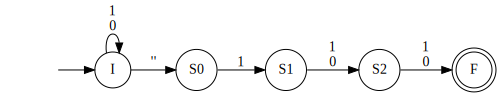

In [ ]:
# Let us see this NFA drawn out

dotObj_nfa(NFA_3rdlast_1, FuseEdges=True)

# Similarly, a high-level overview of "ends in 0101"


### Example :    0 __0101__ 

### Example : 10100 __0101__ 
 

 

In [ ]:
# Our automd markdown works for NFA also. Here is the NFA for
# the language "ends in 0101"

NFA_ends0101 = md2mc(''' 

NFA

I    : 1   -> I      !! I goes to I upon 1

I    : 0   -> S0, I  !! I goes to S0 and I upon 0

S0   : 1   -> S01    !! S0 goes to S01 upon 1

S01  : 0   -> S010   !! S01 goes to S010 upon 0

S010 : 1   -> F      !! S010 goes to F upon F

!!---
''')

# We will use Python widgets to understand this NFA and also others

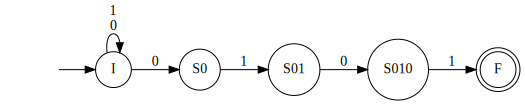

In [ ]:
# The drawing produces separated self-loops. Let's fuse 'em

# Now we are going to fuse the separate self-loops into one

dotObj_nfa(NFA_ends0101, FuseEdges=True) 

# Let us run NFA interactively via widgets

We have two NFA to play with, namely nfa_ends0101 and NFA_3rdlast_1


In [ ]:
import ipywidgets as wdg
def run_nfa_slider(N, s, n):
    """Run NFA N from N["Q0"] (which is a set..) on substring s[0:n]
    """
    S = N["Q0"] 
    if (n > len(s)):
        n = len(s)
    print("string = ", s[0:n])
    run_nfa(N, S, s[0:n], True)
    
def run_nfa_int(N1, N2):
    """Run interactively from the given NFA .. from {q0} 
       on input string's substring
       as picked by slider.
    """
    inp = input("Please provide string: ")
    wdg.interact(run_nfa_slider, N = {'ends0101': N1, '3rdlast_is_1': N2}, 
                 s = inp, n=(0,32))
    
def test_run_nfa_int(N1, N2):
    """Test the interactive run of NFA.
    """
    run_nfa_int(N1, N2)

#-- enable this later. test_run_nfa_int()

# Ends 0101 (above) and Third_Last_is_1 (below)

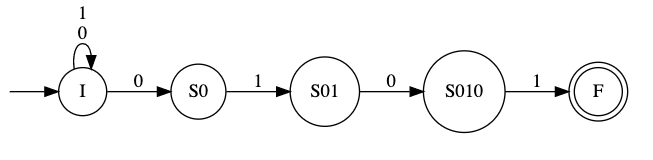

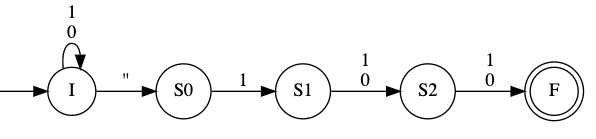

In [ ]:
test_run_nfa_int(NFA_ends0101, NFA_3rdlast_1)

Please provide string: 010010010


interactive(children=(Dropdown(description='N', options={'ends0101': {'Q': {'S010', 'I', 'F', 'S0', 'S01'}, 'S…

# Why NFA?

## 1) NFA emphasize the essence of the language of interest
## 2) By exploiting the ability to be in a set of states, it remains compact

## A good example is "third last is a 1" i.e.
### {0,1}* 1 {0,1} {0,1}

## A DFA for this language ends up keeping the full history of 3 past bits

## It is tedious and error-prone to design!

# __Let us design a DFA directly for this language and see what happens (how big it gets)!__

### It will be exponentially large (2^3 states, or 8 states)

### For 4th-last is a 1, the NFA will have 16 states

### This is one example of when a DFA becomes large
### More importantly, this DFA is very hard to trust ... its state semantics cannot be reliably argued
 

In [29]:
ThirdLastIs1DFA = md2mc(
'''
DFA

I      :  0   -> I    !! A 0 need not be remembered
I      :  1   -> S1   !! A 1 needs to be remembered

S1     :  0   -> S10  !! Record where the 1 is
S1     :  1   -> S11  !! ditto

S10    :  0   -> F00  !! The 1 has been pushed to the "third last"
S10    :  1   -> F01  !! ditto

S11    :  0   -> F10  !! The 1 has been pushed to the third last
S11    :  1   -> F11  !! ditto

F00    :  0   -> I   !! The 1 is gone from the picture (no longer in the third-last)
F00    :  1   -> S1  !! ditto

F01    :  0   -> S10  !! The 1 is gone from the picture 
F01    :  1   -> S11  !! ditto

F10    :  0   -> F00  !! There is a 1 in the third-last position now
F10    :  1   -> F01  !! ditto

F11    :  0   -> F10  !! There is a 1 in the third-last position
F11    :  1   -> F11  !! ditto

'''
)

# All NFA are equivalent in power to DFA
## DFA tend to be much larger than the NFA
## DFA are never smaller

# __Let us see how large this DFA is__

## __(we won't bother to design a DFA for 'fourth last is 1'; it will be too tedious)__

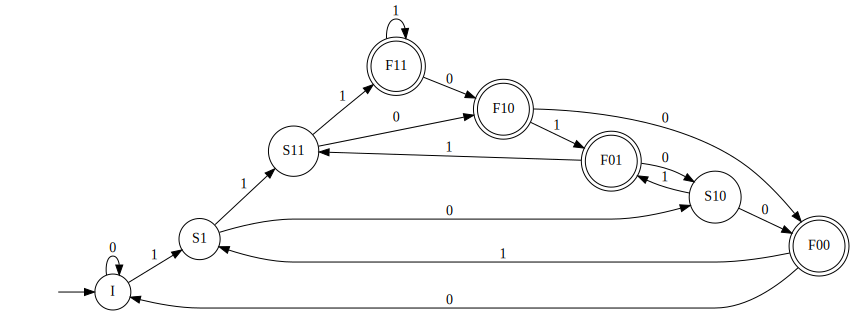

In [30]:
dotObj_dfa(ThirdLastIs1DFA, FuseEdges=True)

## An NFA avoids the specification complexity, but requires the use of nondeterminism
### A big plus is that it is VERY easy to trust

## Let us read this NFA

### * In I, Upon a 0 or a 1, stay in state I
### * But also when in state I, we can go into state S without reading any input
###   - We say that the NFA is in a set of states {I,S}
###   - This is the EClosure step (mentioned later)

### * Then we look for a '1' followed by two arbitrary symbols
### * __In state F, if any inputs are fed, the NFA tokens "fall off the diagram"__
###   - This means that the NFA is now in an "empty set of states"


In [31]:
ThirdLastIs1NFA = md2mc('''
NFA  

I   : 0|1 -> I

I   : ''  -> S

S   : 1   -> Sa

Sa  : 0|1 -> Sb

Sb  : 0|1 -> F

''')

# Let us study the third-last-is-1 NFA's behavior

Put it in animate mode, and then single-step to see the EClosure of states

In [32]:
AnimateNFA(ThirdLastIs1NFA, FuseEdges=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

# An alternate NFA for "third last is 1"

## __This one does not use the Epsilon transition__ but a direct non-deterministic move 
### - From state I, upon 1, we are in a set of states {I, Sa}
### - From state I, upon 0, we are in a set of states {I}

# In an NFA, in a state s, when an input arrives, it always goes to a __set of states__

In [33]:
ThirdLastIs1NFAalt = md2mc('''
NFA  

I   : 0|1 -> I

I   : 1   -> Sa

Sa  : 0|1 -> Sb

Sb  : 0|1 -> F

''')

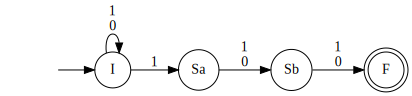

In [34]:
dotObj_nfa(ThirdLastIs1NFAalt, FuseEdges=True)

In [35]:
AnimateNFA(ThirdLastIs1NFAalt, FuseEdges=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

# Let us now demonstrate basic NFA operations on NFA for 3rd-last is 1

In [36]:
# Here is the automd (markdown) for an NF whose third-last symbol is a 1

NFA_3rdlast_1 = md2mc('''
NFA

I : 0  | 1  -> I  !! Upon a 0 or a 1, continue to stay in state I

I : ''      -> S0 !! Nondeterministically transition to state S0

S0 : 1      -> S1 !! This is the key "1" (third-last being 1) seen

S1 : 0 | 1  -> S2 !! One 0/1 takes the NFA to S2

S2 : 0 | 1  -> F  !! One more 0/1 takes the NFA to F

''')

# NFAs are structures

$(Q, \Sigma, \Delta, Q_0, F)$

## * Q is a set of states

## * $\Sigma$ is an alphabet (recall alphabets do not contain epsilon)

## * $Q_0\subseteq Q$ is a non-empty __set of starting states__

## * $F\subseteq Q$ is a set of final states

## * $\delta$ is a function with signature  $Q \times \Sigma_{\varepsilon} \rightarrow {\cal P}(Q)$

That is, an NFA can

* transition upon something inside $\Sigma$ or upon $\varepsilon$

* It always ends up going to a set of next states

In [37]:
# Let us see its internal representation

NFA_3rdlast_1

{'Q': {'F', 'I', 'S0', 'S1', 'S2'},
 'Sigma': {'0', '1'},
 'Delta': {('I', '0'): {'I'},
  ('I', '1'): {'I'},
  ('I', ''): {'S0'},
  ('S0', '1'): {'S1'},
  ('S1', '0'): {'S2'},
  ('S1', '1'): {'S2'},
  ('S2', '0'): {'F'},
  ('S2', '1'): {'F'}},
 'Q0': {'I'},
 'F': {'F'}}

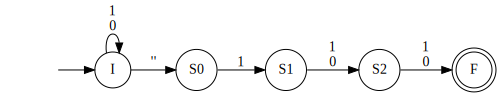

In [38]:
# Let us see this NFA drawn out

dotObj_nfa(NFA_3rdlast_1, FuseEdges=True)

In [39]:
# Let's step the NFA on epsilon   
step_nfa(NFA_3rdlast_1, "I", "")

{'S0'}

In [40]:
# Let's step it on '0'  
step_nfa(NFA_3rdlast_1, "I", "0")

{'I'}

In [41]:
# Step it on a "1" to see two next states. That shows nondeterminism!

step_nfa(NFA_3rdlast_1, "I", "1")  

{'I'}

In [42]:
# What is the Eclosure of the set of states {I} ?

Eclosure(NFA_3rdlast_1, {"I"})

{'I', 'S0'}

In [43]:
help(accepts_nfa)

Help on function accepts_nfa in module jove.Def_NFA:

accepts_nfa(N, s, chatty=False)
    NFA acceptance.
    Input : N : given NFA
            s : given string
            chatty : Boolean (prints accepting path,
                     which is the state-sets encountered).



In [44]:
accepts_nfa(NFA_3rdlast_1, "0100100", chatty=True)

States reached =  {'I', 'S0'}
States reached =  {'I', 'S1', 'S0'}
States reached =  {'I', 'S2', 'S0'}
States reached =  {'I', 'F', 'S0'}
States reached =  {'I', 'S1', 'S0'}
States reached =  {'I', 'S2', 'S0'}
States reached =  {'I', 'F', 'S0'}
NFA accepts '0100100' by reaching {'I', 'F', 'S0'}


True

# Document NFAs well

In [45]:
# Our automd markdown works for NFA also. Here is the NFA for
# the language "ends in 0101"

NFA_ends0101 = md2mc(''' 
!!---------------------------------------------------------------------------
!! This NFA looks for patterns of the form 
!!
!!     ......<some 0's and 1's>.....0101
!!
!! i.e., all strings that end in 0101.
!!
!! This example (over and above thirdlastis1.nfa) also illustrates
!! the power of nondeterminism. Anytime we see a 0 from state I, we
!! can have the NFA speculate that it is seeing the beginning of a
!! 0101 pattern! If the NFA fails in its guess, it pays no price
!! (because another guess is soon coming from behind).
!!
!! * We take 4 states in the NFA solution. The DFA solution takes
!!   5 states.
!!
!! * This shows how burden is shifted from the
!!   human to the computer doing the NFA simulation.
!!   Even though the savings in states is not dramatic,
!!   the effort to build this NFA is much lower than building
!!   the corresponding DFA.
!! 
!!-----------------------------------------------------------------
!! For NFA, each line can be as follows:
!!
!! State : in1 | in2 ...  ->  COmma, Separated, State, List  !! comment
!!-----------------------------------------------------------------

NFA

I    : 1   -> I      !! I goes to I upon 1

I    : 0   -> S0, I  !! I goes to S0 and I upon 0

S0   : 1   -> S01    !! S0 goes to S01 upon 1

S01  : 0   -> S010   !! S01 goes to S010 upon 0

S010 : 1   -> F      !! S010 goes to F upon F

!!---
''')

# This is an example from Figure 7.7 of the book

I am choosing to type it in two different ways: one with a single initial state, and 
another with multiple initial states. Fig77 is the single initial state version, and
Fig77a is with multiple initial states

In [54]:
Fig77 = md2mc('''NFA
I : '' -> A, G
A : '' -> B, C
G : 1  -> F
B : 1  -> D
C : 0  -> E
D : '' -> A, G
E : '' -> A, G
''')

In [55]:
AnimateNFA(Fig77, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

# This is how you specify multiple initial states

## The result of an important algorithm called "Subset Construction" is now shown

## This is how you turn an NFA into a language-equivalent DFA

In [56]:
Fig77a = md2mc('''NFA
IA : '' -> B, C
IG : 1  -> F
B : 1  -> D
C : 0  -> E
D : '' -> IA, IG
E : '' -> IA, IG
''')

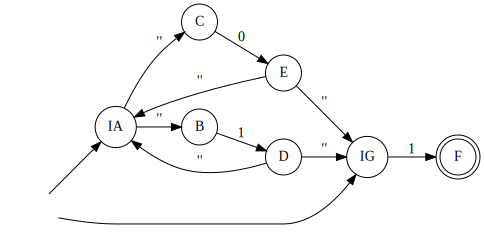

In [57]:
dotObj_nfa(Fig77a)

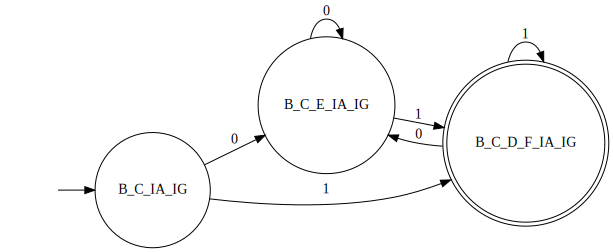

In [ ]:
dotObj_dfa(nfa2dfa(Fig77a, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

## Alternate definition of the NFA of Figure 7.7 is below
## Illustrates the use of multiple initial states

 

In [50]:
Fig77alt = md2mc(

'''NFA
!! --- GONE !!   ---> I : '' -> A, G

!! --- replace  A : '' -> B, C  by
IA : '' -> B, C

!! --- replace G : 1  -> F  by
IG : 1  -> F

B : 1  -> D
C : 0  -> E

D : '' -> IA, IG  !! suitably changed

E : '' -> IA, IG  !! suitably changed
''')

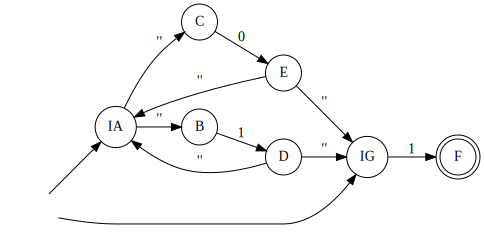

In [51]:
dotObj_nfa(Fig77alt, FuseEdges="True")

In [52]:
Fig77alt

{'Q': {'B', 'C', 'D', 'E', 'F', 'IA', 'IG'},
 'Sigma': {'0', '1'},
 'Delta': {('IA', ''): {'B', 'C'},
  ('IG', '1'): {'F'},
  ('B', '1'): {'D'},
  ('C', '0'): {'E'},
  ('D', ''): {'IA', 'IG'},
  ('E', ''): {'IA', 'IG'}},
 'Q0': {'IA', 'IG'},
 'F': {'F'}}

In [53]:
AnimateNFA(Fig77alt, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

# An NFA can be turned into a DFA through an algorithm called __subset construction__

## It is good to see the result of this algorithm and then understand what/how it-does/is-done

In [ ]:
help(nfa2dfa)

Help on function nfa2dfa in module jove.Def_NFA:

nfa2dfa(N, STATENAME_MAXSIZE=20)
    In : N (consistent NFA), and optional STATENAME_MAXSIZE
         for the generated DFA states
    Out: A consistent DFA that is language-equivalent to N.



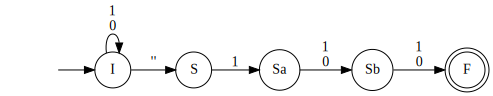

In [58]:
dotObj_nfa(ThirdLastIs1NFA, FuseEdges=True)

In [59]:
nfa2dfa(ThirdLastIs1NFA)

{'Q': {'St0', 'St1', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7'},
 'Sigma': {'0', '1'},
 'Delta': {('St7', '1'): 'St5',
  ('St7', '0'): 'St7',
  ('St5', '1'): 'St4',
  ('St5', '0'): 'St6',
  ('St4', '1'): 'St0',
  ('St4', '0'): 'St2',
  ('St6', '1'): 'St1',
  ('St6', '0'): 'St3',
  ('St0', '1'): 'St0',
  ('St0', '0'): 'St2',
  ('St2', '1'): 'St1',
  ('St2', '0'): 'St3',
  ('St1', '1'): 'St4',
  ('St1', '0'): 'St6',
  ('St3', '1'): 'St5',
  ('St3', '0'): 'St7'},
 'q0': 'St7',
 'F': {'St0', 'St1', 'St2', 'St3'}}

# Our initial printout is not revealing-enough

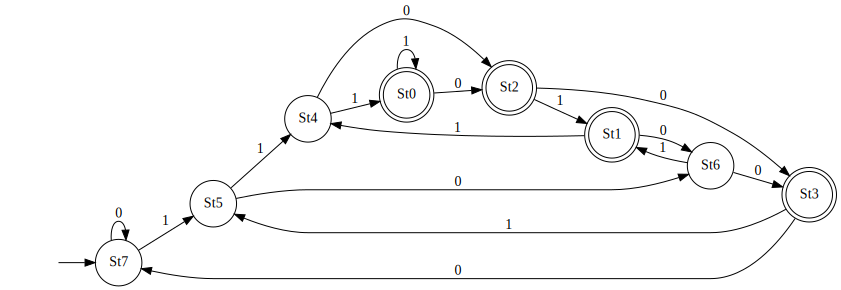

In [60]:
dotObj_dfa(nfa2dfa(ThirdLastIs1NFA), FuseEdges=True)

In [61]:
nfa2dfa(ThirdLastIs1NFA, STATENAME_MAXSIZE=30)

{'Q': {"{'F', 'I', 'S', 'Sa', 'Sb'}",
  "{'F', 'I', 'S', 'Sa'}",
  "{'F', 'I', 'S', 'Sb'}",
  "{'F', 'I', 'S'}",
  "{'I', 'S', 'Sa', 'Sb'}",
  "{'I', 'S', 'Sa'}",
  "{'I', 'S', 'Sb'}",
  "{'I', 'S'}"},
 'Sigma': {'0', '1'},
 'Delta': {("{'I', 'S'}", '1'): "{'I', 'S', 'Sa'}",
  ("{'I', 'S'}", '0'): "{'I', 'S'}",
  ("{'I', 'S', 'Sa'}", '1'): "{'I', 'S', 'Sa', 'Sb'}",
  ("{'I', 'S', 'Sa'}", '0'): "{'I', 'S', 'Sb'}",
  ("{'I', 'S', 'Sa', 'Sb'}", '1'): "{'F', 'I', 'S', 'Sa', 'Sb'}",
  ("{'I', 'S', 'Sa', 'Sb'}", '0'): "{'F', 'I', 'S', 'Sb'}",
  ("{'I', 'S', 'Sb'}", '1'): "{'F', 'I', 'S', 'Sa'}",
  ("{'I', 'S', 'Sb'}", '0'): "{'F', 'I', 'S'}",
  ("{'F', 'I', 'S', 'Sa', 'Sb'}", '1'): "{'F', 'I', 'S', 'Sa', 'Sb'}",
  ("{'F', 'I', 'S', 'Sa', 'Sb'}", '0'): "{'F', 'I', 'S', 'Sb'}",
  ("{'F', 'I', 'S', 'Sb'}", '1'): "{'F', 'I', 'S', 'Sa'}",
  ("{'F', 'I', 'S', 'Sb'}", '0'): "{'F', 'I', 'S'}",
  ("{'F', 'I', 'S', 'Sa'}", '1'): "{'I', 'S', 'Sa', 'Sb'}",
  ("{'F', 'I', 'S', 'Sa'}", '0'): "{'I', 'S', '

In [62]:
help(dotObj_dfa)

Help on function dotObj_dfa in module jove.DotBashers:

dotObj_dfa(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D1 (DFA : partially consistent)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Suppress "black-hole states".



# With the right options, we get more info

## We clearly see that the NFA starts in state {I,S} (that is what the algorithm does)

## Following the algorithm along is easy:

### * Start from {I,S}

### * Eclose this set (Epsilon-close)

#### - For ThirdLastIs1NFA, the initial state is {I} and its EClosure is {I,S}

#### - For ThirdLastIs1NFAalt, the initial state is {I} and the EClosure is {I}

__Let us work this out in class__

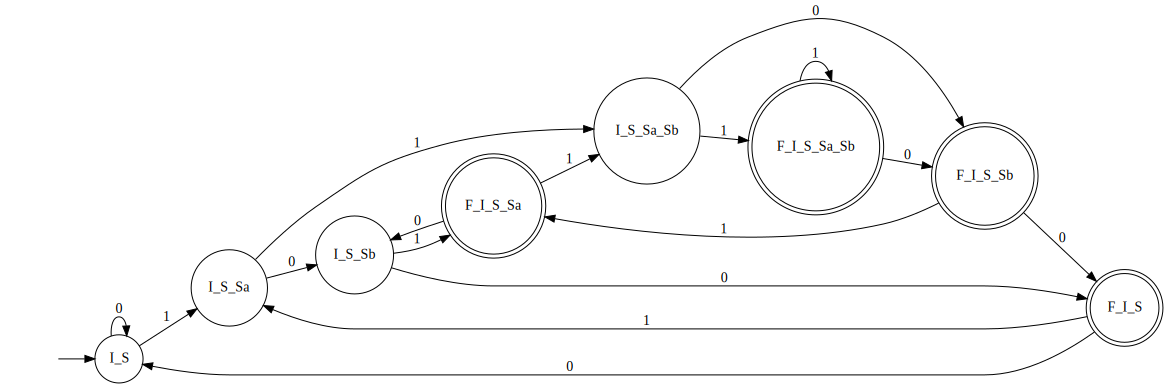

In [63]:
dotObj_dfa(nfa2dfa(ThirdLastIs1NFA, STATENAME_MAXSIZE=30), STATENAME_MAXSIZE=30)

## In case you want to save a PDF and print/hang on your wall...

In [ ]:
dotObj_dfa(nfa2dfa(ThirdLastIs1NFA, STATENAME_MAXSIZE=30), STATENAME_MAXSIZE=30).render('ThirdLastDFA.pdf')

'ThirdLastDFA.pdf.pdf'

# Another example of where NFA help - a finite language DFA and NFA

In [64]:
DFA_a_bc_ca = md2mc(
'''
DFA

I : a -> F
I : b -> Sb
I : c -> Sc

Sb : c -> F
Sb : a|b -> BH

Sc : a   -> F
Sc : b|c -> BH

F  : a|b|c -> BH

BH : a|b|c -> BH
''')

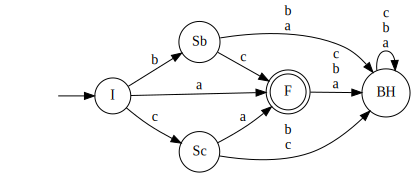

In [ ]:
dotObj_dfa_w_bh(DFA_a_bc_ca, FuseEdges=True)

In [ ]:
NFA_a_bc_ca = md2mc(
'''
NFA

I1 : a -> F1

I2 : b -> Sb
Sb : c -> F2

I3 : c -> Sc
Sc : a -> F3
''')

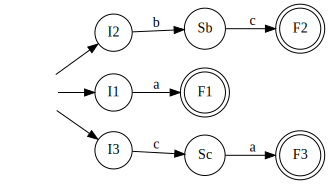

In [ ]:
dotObj_nfa(NFA_a_bc_ca)

In [ ]:
AnimateNFA(NFA_a_bc_ca, FuseEdges=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

In [ ]:
dotObj_nfa(re2nfa("(a+bc+ca)(a+bc+ca)")).render("a_bc_ca_concat.pdf")

Generating LALR tables


'a_bc_ca_concat.pdf.pdf'

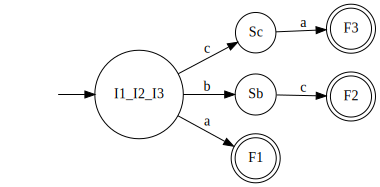

In [ ]:
dotObj_dfa(nfa2dfa(NFA_a_bc_ca))